# Введение

**Описание проекта:**

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит спрогназировать потенциально популярный продукт и спланировать рекламные кампании.\
Данные взяты из файла https://code.s3.yandex.net/datasets/games.csv

**Цель проекта:** 
1. Определить закономерности успешности игр 
2. Построить прогноз на 2017 год
3. Проверить гипотизы:
    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные    соревнования») разные


**Этапы проекта:**
1. Знакомство с данными
2. Обработка данных
3. Расчет и добавление результатов в таблицу 
4. Исследовательский анализ данных
5. Проверка гипотиз
6. Общий вывод и заключения

**Описание данных**\
Name — название игры\
Platform — платформа\
Year_of_Release — год выпуска\
Genre — жанр игры\
NA_sales — продажи в Северной Америке (миллионы проданных копий)\
EU_sales — продажи в Европе (миллионы проданных копий)\
JP_sales — продажи в Японии (миллионы проданных копий)\
Other_sales — продажи в других странах (миллионы проданных копий)\
Critic_Score — оценка критиков (максимум 100)\
User_Score — оценка пользователей (максимум 10)\
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.\
**Данные за 2016 год могут быть неполными.**

## Обзор данных

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# чтение файла с данными
import os
pth1 = 'C:\\Users\\Влада\\Desktop\\обучение\\проект\\Игры\\games.csv'
pth2 = '/datasets/games.csv'
if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print("Проверьте правильность пути к датасету")

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# общая информация о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Предобработка данных

### Замена названий столбцов

In [5]:
# приведу названия к нижнему регистру
df.columns= df.columns.str.lower()

### Обработка пропусков и замена типов данных

In [6]:
# проверка на наличие пропусков
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
# удалю пропущеные значения с названием и жанром. 2 строки не повлияют на результат исдледования.
df = df.dropna(subset=['name']).reset_index(drop=True)

In [8]:
# удаляю пропущеные значения в столбце 'year_of_release' и переведу в тип int 
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
df['year_of_release'] = df['year_of_release'].astype('int')

В столбце `user_score` есть значения 'tbd' это значит, что пользователь еще не поставил оценку. Заменю все пропущеные значения и значения 'tbd' на -1 и приведу к типу float для удобства в дальнейшей работе.\
Так же в столбце `critic_score` пропущеные значения заменю на -1 и в столбце `rating` - на значения `unknown` \
Это необходимо для дальнейшего иследования, чтобы была возможность исключить данные значения для лучшей визуализации и корректных расчетов.

In [9]:
# заменю пропущеные значения в столбце 'user_score' на -1 и переведу в тип float
df.loc[(df['user_score'] == 'tbd') | (df['user_score'].isna()), 'user_score'] = -1
df['user_score'] = df['user_score'].astype('float')

In [10]:
# заменю пропущеные значения в 'critic_score' на -1
df['critic_score'] = df['critic_score'].fillna(-1)

In [11]:
# заменю пропущеные значения в 'rating' на unknown
df['rating'] = df['rating'].fillna('unknown')

In [12]:
# создам столбец с общей суммой продаж по всем странам
df['total_sales'] = round(df.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1), 2)

In [35]:
# выведу на экран первые 10 строк
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


In [14]:
# проверка на дубликаты
df.duplicated().sum()

0

Пропущеные значения в таблице в столбце год релиза могли появиться из-за ошибки в выгрузке данных. Пропуски в столбцах с оценками пользователей вероятнее всего еще не выставили оценки, или кто то вовсе не захотел их ставить. Так же с оценками критиков вероятнее всего оценки еще не выставлены. А вот рейтинг ESRB, выставляется только для игр выпущеных в США и Канаде, соответствено игры выпускаемые в других регионах не оцениваются, отсюда и пропуски. 

## Исследовательский анализ данных

В данном разделе мы изучим, что влияет на цену, какие игры покупают чаще и посмотрим распределение по годам.

### Распределение кол-ва игр по годам и платформам

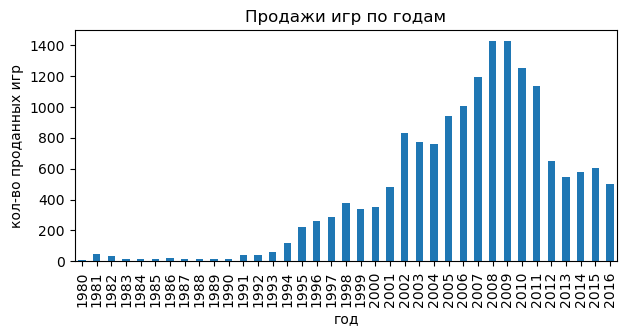

In [16]:
# график по кол-ву выпускаемых игр в разные годы
df[df['year_of_release']>0].groupby('year_of_release')['total_sales'].count().plot(kind='bar',\
figsize=(7, 3), xlabel='год', ylabel='кол-во проданных игр', title='Продажи игр по годам')
plt.show()

Рост по кол-ву выпускаемых игр начинается с 1993 по 2009 гг. с 2010 по 2016 гг. новых игр выпускают меньше. Так как индустрия игр динамично развивается, считаю нужно выбрать актуальный период с 2013 по 2016 гг. (берем 3 года, т.к. за 2016 г. данные не полные)

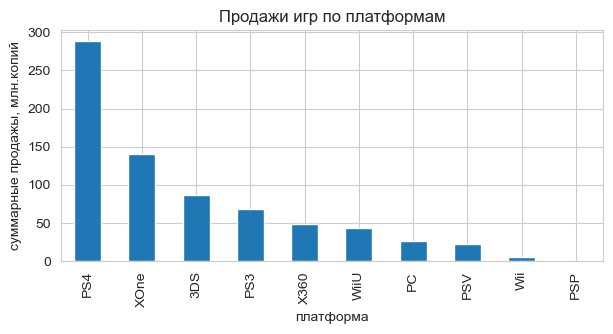

In [36]:
# создам таблицу с актуальным периодом с 2013 по 2016 гг.
df_years = df[df['year_of_release']>2013]

# сгруппирую по платформам общюю сумму продаж
platform_sales = df_years.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# построю гистограмму распределения
platform_sales.plot(kind='bar', figsize=(7, 3), xlabel='платформа', ylabel='суммарные продажы, млн.копий',\
                    title='Продажи игр по платформам', grid=True)
plt.show()

За период с 2013 по 2016 платформа PS4 лидер продаж, ее объем в 2 раза больше конкурентов около 290 млн копий.  XOne - продала 140 млн. копий и 3DS и PS3 платформы продали за 3 года больше 50 млн. копий каждая.

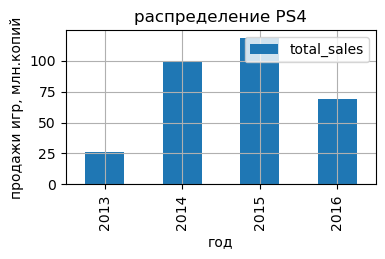

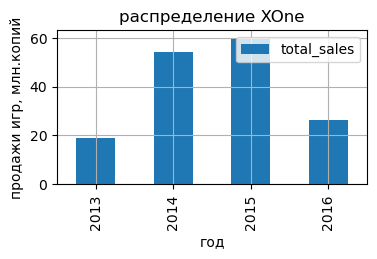

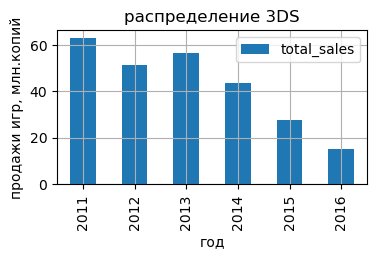

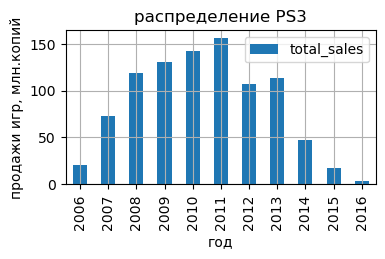

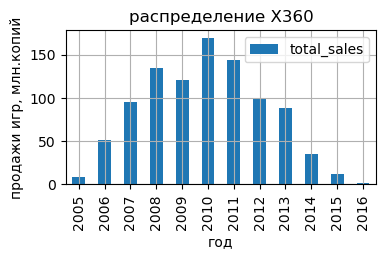

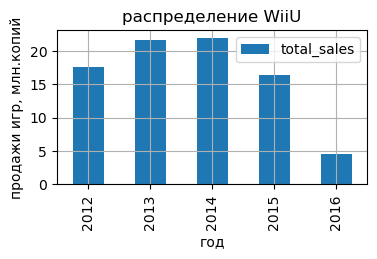

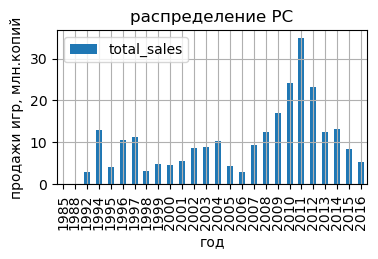

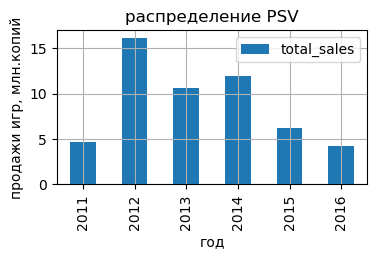

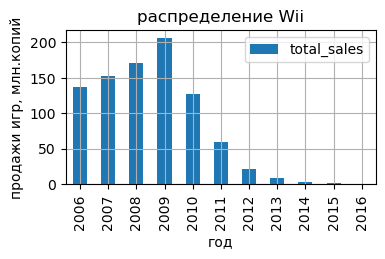

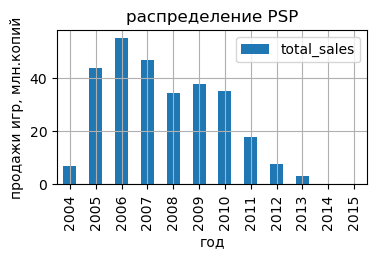

In [20]:
# построю графики распределения для всех платформ, посмотрю как развивались платформы за все время.
platform_top = platform_sales.index[:]
#цикл выведет график для каждой платформы
for platform in platform_top:
    df_plot = df[(df['platform'] == platform) & (df['year_of_release']>0)].groupby('year_of_release')\
    .agg({'total_sales': 'sum'})
    df_plot.plot(kind='bar', figsize=(4, 2), grid=True)
    plt.xticks(ticks=range(len(df_plot)), labels=df_plot.index.astype(int))
    plt.title(f'распределение {platform}')
    plt.xlabel('год')
    plt.ylabel('продажи игр, млн.копий')
    plt.show()

Платформы 'PS4' и  'XOne' лидеры рынка. Они новички, их игры выходят с 2013г. У 'PS4' в 2015г. продажы вырасли в 4 раза с 25 млн.копий до 120 млн.копий, а 'XOne' в 2015 продал 60 млн. против почти 20 млн. в 2013г. 

А вот платформы PSP и Wii аутсайдеры рынка.
Платформы PSP в 2016г. не продала не одной копии. Платформа Wii за 2015-2016 продала очень мало копий.
Можно выделить, что жизненый цыкл платформ длится около 10 лет. Первые 2-5 лет наблюдается рост, далее продажи падают.  

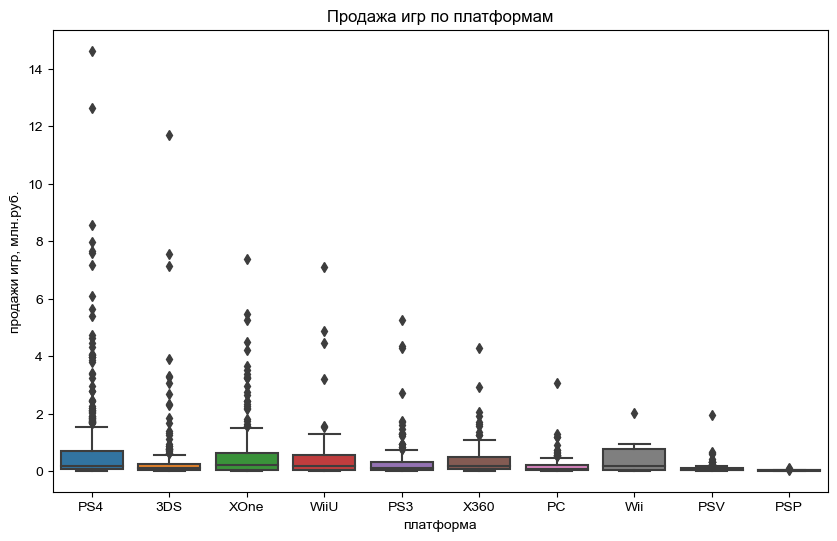

In [21]:
# сгрупирую данные для 10 платформ вывускающие игры с 2013 по 2016 гг.
platform_top10 = platform_sales.index[:]
platform_actual_top = df_years.query('platform in @platform_top10').sort_values(by='total_sales', ascending=False)

# построю графики «ящик с усами» по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(10, 6))
sns.boxplot(data=platform_actual_top, x='platform', y='total_sales')\
.set(xlabel='платформа', ylabel='продажи игр, млн.руб.', title='Продажа игр по платформам')
sns.set_style('whitegrid')
plt.show()

In [37]:
# выведу статистической сводку по таблице 
platform_actual_top['total_sales'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64

**Вывод:** все платформы в среднем продают игр 0.43 млн.копий. Основное распределение от 0.1 до 0.35 млн. копий. У лидеров рынка есть небольшое кол-во игр которые продаются  в больших объемах. Максимальное кол-во копий продано у платформы PS4 -  14,63 млн.

### Влияние оценок на прожи игр на лидирующих платформах

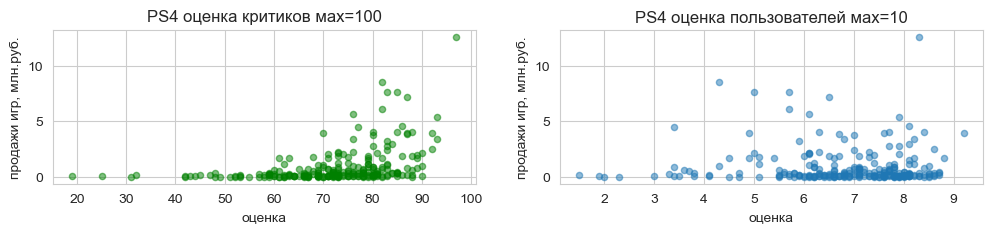

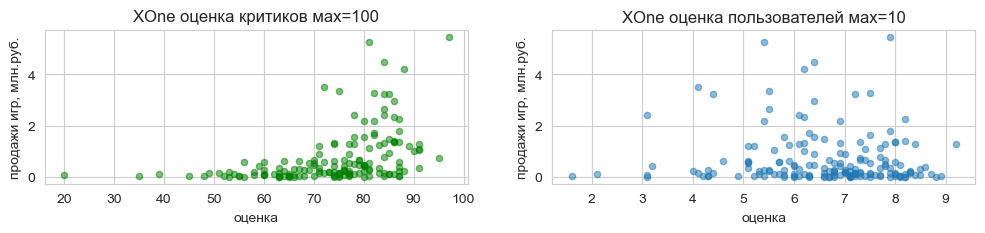

In [23]:
# построю графики распределения по разным оценкам для 2х лидирующих платформ  
platform_top2 = platform_sales.index[:2]
for platform in platform_top2:
    df_plot_critic = df_years.query('platform == @platform and critic_score>0')
    df_plot_user = df_years.query('platform == @platform and user_score>0') 
    fig, ax = plt.subplots(1, 2, figsize=(12, 2))
    
    df_plot_critic.plot(x='critic_score', y='total_sales', kind='scatter', color = 'g', ax=ax[0], grid=True, alpha=0.5)\
    .set(xlabel='оценка', ylabel='продажи игр, млн.руб.', title=f'{platform} оценка критиков мах=100')
    
    df_plot_user.plot(x='user_score', y='total_sales', kind='scatter', ax=ax[1], grid=True, alpha=0.5)\
    .set(xlabel='оценка', ylabel='продажи игр, млн.руб.', title= f'{platform} оценка пользователей мах=10')
    plt.show()
    

In [24]:
# считаю коэффициент корреляции для 2х топ платформ
for cor in platform_top2:
    df_corr_critic = df_years.query('platform == @cor and critic_score>0')
    df_corr_user = df_years.query('platform == @cor and user_score>0')
    print(f'Коэффициент корреляции по оценки критиков {cor}:', df_corr_critic['critic_score']\
          .corr(df_corr_critic['total_sales']))
    print(f'Коэффициент корреляции по оценки пользователей {cor}:', df_corr_user['user_score']\
          .corr(df_corr_user['total_sales']))

Коэффициент корреляции по оценки критиков PS4: 0.4026614106810409
Коэффициент корреляции по оценки пользователей PS4: -0.04013158947269729
Коэффициент корреляции по оценки критиков XOne: 0.428676943703332
Коэффициент корреляции по оценки пользователей XOne: -0.07038392806475818


**Вывод:** Сумма продаж не зависит от оценки пользователей и критиков коэффициент корреляции очень низкий.

### Влияние оценок на прожи игр на других платформах
Рассмотрим, как влияют оценки критиков и пользователей для платформ не являющиесями лидерами. Для анализа возьмем платформы '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV'. Платформы 'Wii', 'PSP' исключила из анализа т.к. у них за последние 3 года очень малое кол-во продаж или продаж нет вовсе.

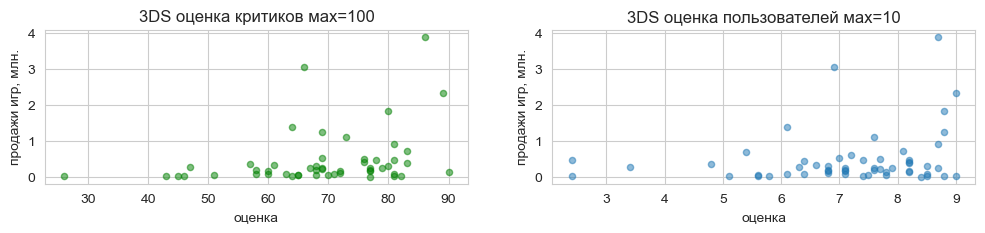

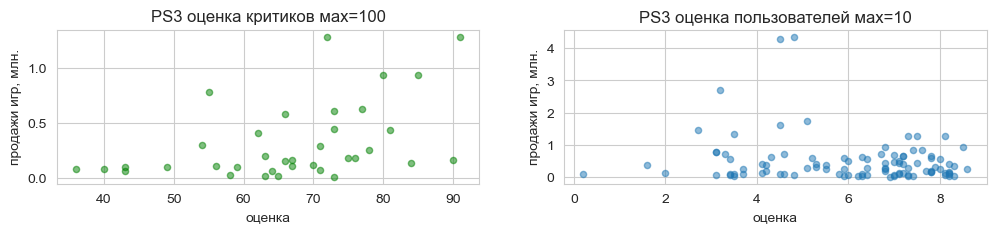

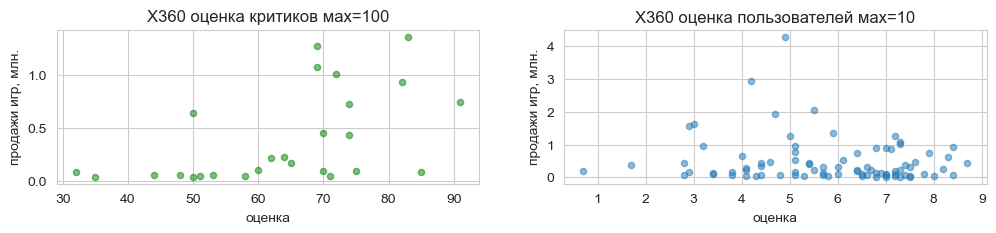

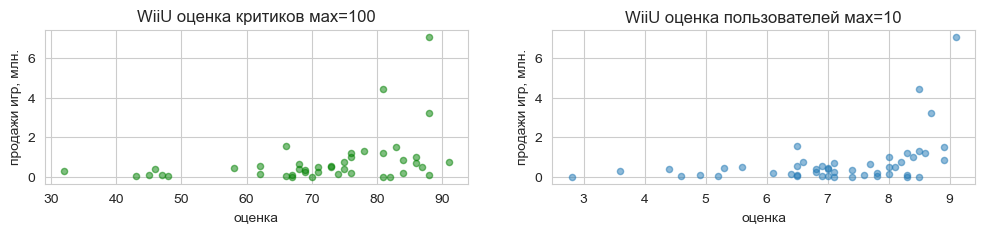

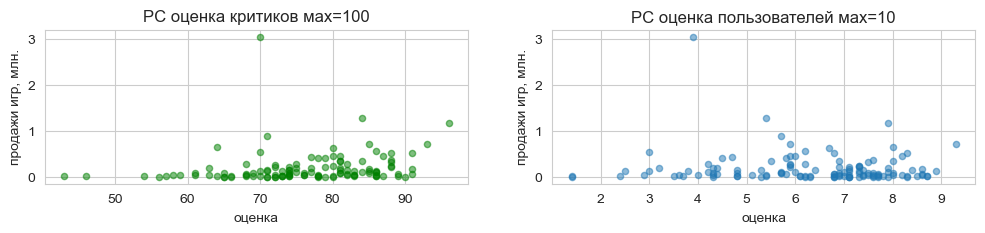

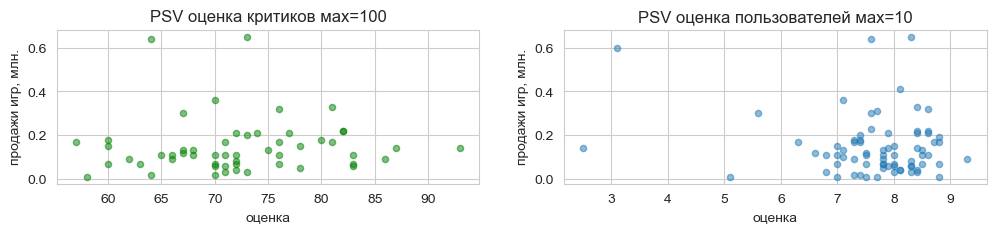

In [26]:
platform_other = platform_sales.index[2:-2]
try:
    
    for platforms in platform_other:
        df_plot_critic = df_years.query('platform == @platforms and  critic_score>0')
        df_plot_user = df_years.query('platform == @platforms and user_score>0')  
    
        fig, ax = plt.subplots(1, 2, figsize=(12, 2))
        df_plot_critic.plot(x='critic_score', y='total_sales', kind='scatter', color = 'g', ax=ax[0], alpha=0.5, grid=True)\
        .set(xlabel='оценка', ylabel='продажи игр, млн.', title=f'{platforms} оценка критиков мах=100')
        df_plot_user.plot(x='user_score', y='total_sales', kind='scatter', ax=ax[1], alpha=0.5, grid=True)\
        .set(xlabel='оценка', ylabel='продажи игр, млн.', title= f'{platforms} оценка пользователей мах=10')
        plt.show()
except:
    pass


In [27]:
# посчитаю корреляцию 
for cor in platform_other:
    df_corr_critic = df_years.query('platform == @cor and  critic_score>0')
    df_corr_user = df_years.query('platform == @cor and user_score>0')  
    print(f'Коэффициент корреляции по оценки критиков {cor}:', df_corr_critic['critic_score']\
          .corr(df_corr_critic['total_sales']))
    print(f'Коэффициент корреляции по оценки пользователей {cor}:', df_corr_user['user_score']\
          .corr(df_corr_user['total_sales']))

Коэффициент корреляции по оценки критиков 3DS: 0.3141174928690509
Коэффициент корреляции по оценки пользователей 3DS: 0.2151932718527028
Коэффициент корреляции по оценки критиков PS3: 0.44657460493190726
Коэффициент корреляции по оценки пользователей PS3: -0.1667614134766211
Коэффициент корреляции по оценки критиков X360: 0.5257228356581521
Коэффициент корреляции по оценки пользователей X360: -0.13844457094566506
Коэффициент корреляции по оценки критиков WiiU: 0.370201412480884
Коэффициент корреляции по оценки пользователей WiiU: 0.40792645792170795
Коэффициент корреляции по оценки критиков PC: 0.1746341376935003
Коэффициент корреляции по оценки пользователей PC: -0.07159665703472452
Коэффициент корреляции по оценки критиков PSV: 0.04266490657009526
Коэффициент корреляции по оценки пользователей PSV: -0.16845504978064438


**Вывод:** Сумма продаж не зависит от оценки пользователей и критиков, коэффициент корреляции очень низкий - даннный вывод подтверждается.

### Влияние жанра на объем продаж

In [28]:
# сгруппирую по жанрам общие продажи
df_genre = df_years.groupby(by='genre').agg(median_sales=('total_sales', 'median'), sum_sales=('total_sales', 'sum'))\
.sort_values(by='median_sales', ascending=False)
df_genre

,median_sales,sum_sales
genre,,
Shooter,0.515,170.94
Sports,0.180,109.48
Platform,0.140,18.09
Fighting,0.125,28.22
Role-Playing,0.110,101.44
Simulation,0.100,13.13
Action,0.090,199.36
Misc,0.090,37.55
Racing,0.090,27.52


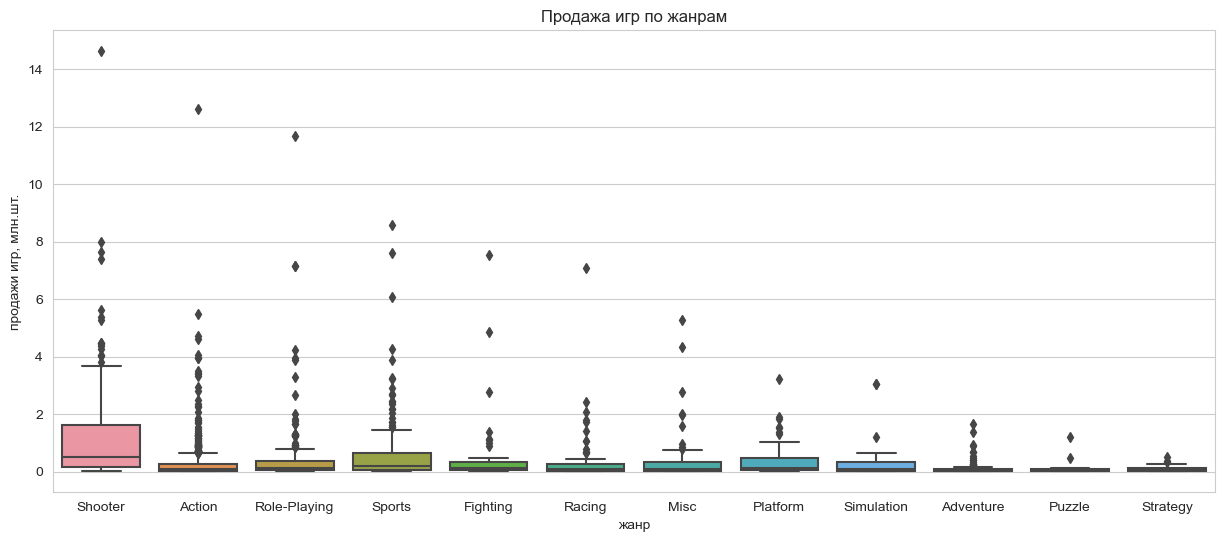

In [29]:
# сгрупирую данные для 10 платформ вывускающие игры с 2013 по 2016 гг.
genre_index = df_genre.index[:]
genre_actual_top = df_years.query('genre in @genre_index')
# построю графики «ящик с усами» по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(15, 6))
sns.boxplot(data=genre_actual_top, x='genre', y='total_sales')\
.set(xlabel='жанр', ylabel='продажи игр, млн.шт.', title='Продажа игр по жанрам')
sns.set_style('whitegrid')
plt.show()

**Вывод:** Самый продаваемы жанр по кол-ву проданых копий Action, его объем почти 200 млн.копий., но если смотреть распределение продаж по медианному значению, Action продается хорошо только в единичных играх, а основное распределение продаж значительно меньше, чем у Shooter. Чуть меньше общая сумма продаж у  Shooter - 170 млн. но если рассматривать медианное значение, Shooter продается стабильно много, поэтому можно сказать что Shooter -лидер среди жанров.  Sports и Role-Playing продаются почти одинаково более 100 млн. каждый. Меньше всего продаются Strategy и Puzzle.

**Общий вывод по разделу**
 Исходя из опыта предшествующих 3х лет можно предположить, что в 2017 году будут востребованы игры от платформ 'PS4' и  'XOne' и жанр Action и Shooter. 

## Портрет пользователя каждого региона

В данном разделе определим:
1) Самые популярные платформы (топ-5).\
2) Самые популярные жанры (топ-5).\
3) Влияет ли рейтинг ESRB на продажи в отдельном регионе.

### Самые популярные платформы топ-5

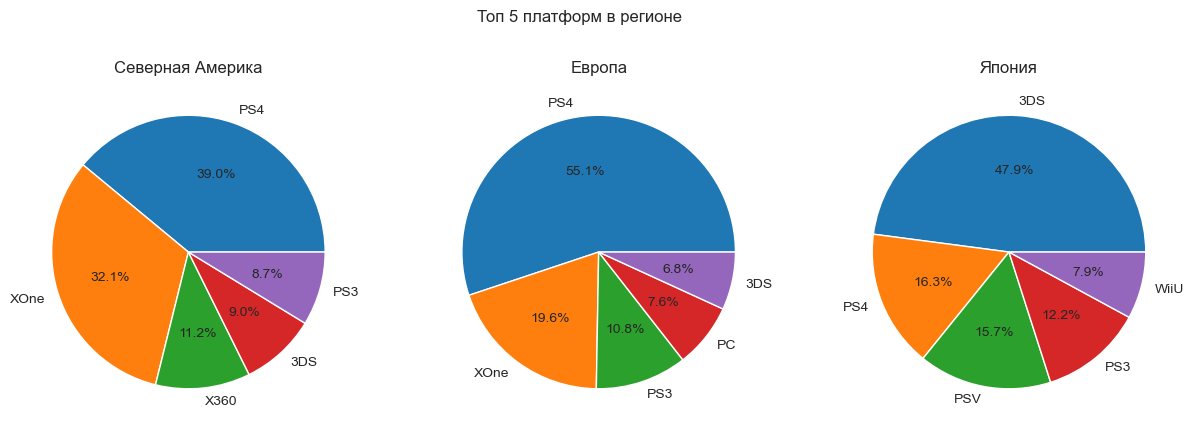

In [30]:
# сгрупирую по регионам топ-5 платформам    
df_region_platform = df_years.groupby(by=['platform']).agg(na_sales=('na_sales', 'sum'),
                                                           eu_sales=('eu_sales', 'sum'),
                                                           jp_sales=('jp_sales', 'sum'))
region=['na_sales', 'eu_sales', 'jp_sales']
region_name = ['Северная Америка', 'Европа', 'Япония']
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
#создаю цикл для построения графиков
for i in range(3):
    region_top=df_region_platform.sort_values(by=region[i], ascending=False).index[:5]
    df_region_platform.query('platform in @region_top').sort_values(by=region[i], ascending=False).\
    plot(y=region[i], 
         kind='pie', 
         figsize=(15, 5), 
         ax=ax[i], ylabel='',  
         title= f'{region_name[i]}', 
         legend='', 
         autopct='%1.1f%%')
fig.suptitle('Топ 5 платформ в регионе')    
plt.show()  

**Вывод:**  Северной Америке и Европе так же ледируют платформы PS4 и XOne. Япония сильно отличается, популярнее всего 3DS, а лидеры PS4 и XOne почти не продаются объем продаж очень маленький.

### Самые популярные жанры топ-5

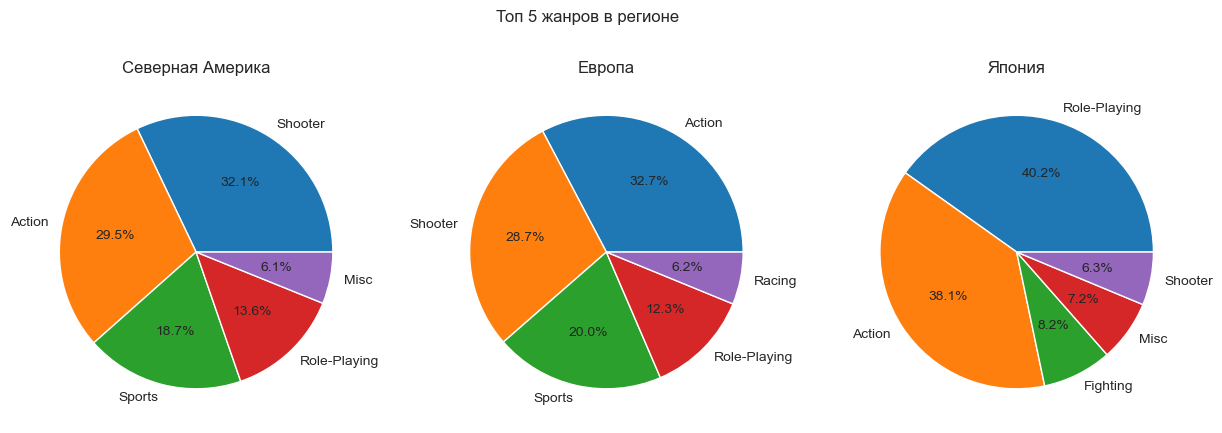

In [31]:
# сгрупирую по регионам топ-5 жанрам   
df_region_genre = df_years.groupby(by=['genre']).agg(na_sales=('na_sales', 'sum'),
                                                     eu_sales=('eu_sales', 'sum'),
                                                     jp_sales=('jp_sales', 'sum'))
region=['na_sales', 'eu_sales', 'jp_sales']
region_name = ['Северная Америка', 'Европа', 'Япония']
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
#создаю цикл для построения графиков
for i in range(3):
    region_top=df_region_genre.sort_values(by=region[i], ascending=False).index[:5]
    df_region_genre.query('genre in @region_top').sort_values(by=region[i], ascending=False).\
    plot(y=region[i],
         kind='pie',
         figsize=(15, 5),
         ax=ax[i], ylabel='',  
         title= f'{region_name[i]}', 
         legend='',
         autopct='%1.1f%%')
fig.suptitle('Топ 5 жанров в регионе')    
plt.show() 

**Вывод:** В Северной Амереке популярнее всего жанр Shooter, В Европе больше покупают Action, а Японцы предпочитают  Role-Playing.

### Влияние рейтинга ESRB на продажи в отдельном регионе.

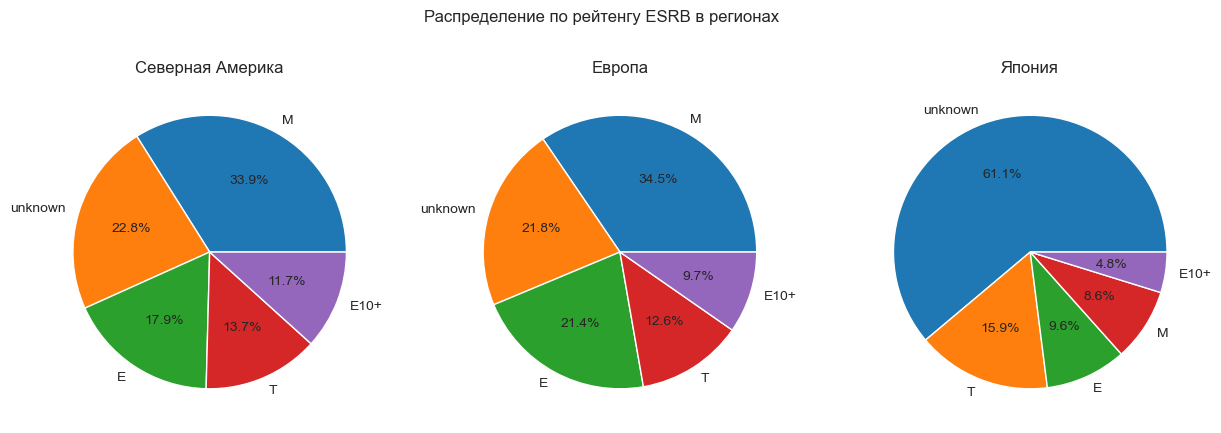

In [32]:
# сгрупирую по регионам категории рейтинга ESRB    
df_region_esrb = df_years.groupby(by=['rating']).agg(na_sales=('na_sales', 'sum'),
                                                      eu_sales=('eu_sales', 'sum'),
                                                      jp_sales=('jp_sales', 'sum'))
region=['na_sales', 'eu_sales', 'jp_sales']
region_name = ['Северная Америка', 'Европа', 'Япония']
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
#создаю цикл для построения графиков
for i in range(3):
    region_top=df_region_esrb.index
    df_region_esrb.query('rating in @region_top').sort_values(by=region[i], ascending=False).\
    plot(y=region[i],
         kind='pie',
         figsize=(15, 5),
         ax=ax[i], ylabel='',  
         title= f'{region_name[i]}', 
         legend='',
         autopct='%1.1f%%')
fig.suptitle('Распределение по рейтенгу ESRB в регионах')    
plt.show() 

**Вывод:** рейтинг ESRB предназначен для маркировки игр сделаных в США и Канаде, на диаграме видно что в Японии очень много пропущеных значений `unknown = 61%` - это может означать, что в Японии продается, не так много игр произведеных  в  США или Канаде. Из тех игр, которые продаются в Японии, выбирают категорию Т - игры для подростков, возраст 13+. В Северной Амереке и Европе самые популярные игры "Для взрослых" возраст 18+ около 34% продаваемых игр, но так же есть пропуски около 22% по каждому региону.  

## Проверка гипотез

В данном разделе буду проверять гипотизы. Сравнивню две большие выборки разные по размеру, поэтому указываю параметр `equal_var=False`, чтобы выполнить t-критерий Уэлча.

Условные обозначения:
* H_0 - нулевая гипотеза, которая проверяется на выборке
* H_a - альтернативная гипотеза, противоположная по смыслу нулевой гипотезе

По завершению теста, сравню значение  `alpha` с полученым `p-значение` и приму решение овергнуть или нет данную гипотизу.

### Проверка гипотизы 1: 
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H_0: Оценка пользователей `user_score` платформы `Xbox` =  оценке пользователей `user_score` пользователей `PC`\
H_a: Оценка пользователей `user_score` платформы `Xbox` ≠ оценке пользователей `user_score` пользователей `PC`\
alpha = 0.05

In [33]:
from scipy import stats as st
import numpy as np
print('Средняя оценка пользовотелей платформы XOne:', 
      round(df_years.query('user_score > 0 and platform == "XOne"')['user_score'].mean(), 1)) 
print('Средняя оценка пользовотелей платформы PC:',  
      round(df_years.query('user_score > 0 and platform == "PC"')['user_score'].mean(), 1))
# задаю значение уровня значимости 0.05
alpha = 0.05 

# вызов метода для проверки гипотезы
results = st.ttest_ind(df_years.query('user_score > 0 and platform == "XOne"')['user_score'],\
                       df_years.query('user_score > 0 and platform == "PC"')['user_score'],\
                       equal_var=False)

# вывод значения p-value на экран
print('p-значение:', results.pvalue)

#сравниваю получившееся p-значение с alpha и вывожу результат на экран
if results.pvalue>alpha:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')


Средняя оценка пользовотелей платформы XOne: 6.6
Средняя оценка пользовотелей платформы PC: 6.3
p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


###  Проверка гипотизы 2: 
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H_0: Оценка пользователей `user_score` у жанра `Action` = оценке пользователей `user_score` жанра `Sports`\
H_a: Оценка пользователей `user_score` у жанра `Action` ≠ оценке пользователей `user_score` жанра `Sports`\
alpha = 0.05


In [34]:
from scipy import stats as st
import numpy as np
print('Средняя оценка пользовотелей жанра Action:', 
      round(df_years.query('user_score > 0 and genre == "Action"')['user_score'].mean(), 2)) 
print('Средняя оценка пользовотелей жанра Sports:',  
      round(df_years.query('user_score > 0 and genre == "Sports"')['user_score'].mean(), 2))
# задаю значение уровня значимости 0.05
alpha = 0.05 

# вызов метода для проверки гипотезы
results = st.ttest_ind(df_years.query('user_score > 0 and genre == "Action"')['user_score'],\
                       df_years.query('user_score > 0 and genre == "Sports"')['user_score'],\
                       equal_var=False)

# вывод значения p-value на экран
print('p-значение:', results.pvalue)

#сравниваю получившееся p-значение с alpha и вывожу результат на экран
if results.pvalue>alpha:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

Средняя оценка пользовотелей жанра Action: 6.76
Средняя оценка пользовотелей жанра Sports: 5.23
p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод:**
* Гипотиза 1: Не получилось отвергнуть нулевую гипотезу. Вероятность очень высока, что средние значения оценки пользователей у платформ Xbox One и PC равны.
* Гипотиза 2: Отвергаем нулевую гипотезу. Вероятность очень мала, что средние оценки пользователей у жанра Action экшен и Sports одинаковые.

## Общий вывод

* По проекту были обработаны данные: исключены пропуски, заменены пропущеные значения, добавлена информации о сумме общих продаж. 
* Проведен исследовательский анализ данных: выделен актуальный период по годам, выбраны топ продаваемых платформ, проведено иссдледование, как оценки пользователей и критиков влияют на продажи, так же определено влияния жанра на прордажи.
* Проверено две гипотизы.

**Общая информация:**
Рост по кол-ву выпускаемых игр начинается с 1993 по 2009гг. с 2010 по 2016гг. новых игр выпускают меньше, наблюдается спад рунка. 
Так как индустрия игр динамично развивается, мной был выбран актуальный период с 2013г. по 2016г.

Можно выделить, что жизненый цикл платформ длится около 10 лет. Первые 2-5 лет наблюдается рост, далее продажи падают.

**Распределение по платформам:**\
Платформы 'PS4' и  'XOne' лидеры рынка. Хотя компании выпускают игры только с 2013г, по прадажам наблюдается рост: 
1. 'PS4' в 2015г. увеличила продажи в 4 раза с 25 млн.копий до 120 млн.копий  
2. 'XOne' в 2015 продал 60 млн., против почти 20 млн. в 2013г. 
 
Платформы PSP и Wii аутсайдеры рынка за выбранный пириод.
* Платформы PSP в 2016г. не продала не одной копии. 
* Платформа Wii за 2015-2016 продала очень мало копий, близко к нулю.

**Влияние оценок на продажи:**
- На продажи не влияют оценки пользователей и критиков коэффициент корреляции очень низкий. 

**Распределение по объему продаж:**\
Все платформы в среднем продают игр 0.43 млн.копий. Основное распределение от 0.1 до 0.35 млн. копий. У лидеров рынка есть небольшое кол-во игр которые продаются  в больших объемах. Максимальное значение по кол-во  проданых копий у платформы PS4 -  14,63 млн.

**Распределение по жанрам:**
1. Самый продаваемы жанр по кол-ву проданых копий Action, его объем почти 200 млн.копий., но если смотреть распределение продаж по медианному значению, Action продается хорошо только в единичных играх. Основное распределение продаж значительно меньше, чем у Shooter. 
2. Чуть меньше общая сумма продаж у  Shooter - 170 млн. но если рассматривать медианное значение, Shooter продается стабильно много, поэтому можно сказать что Shooter -лидер среди жанров.  
3. Sports и Role-Playing продаются почти одинаково более 100 млн. каждый. 
4. Меньше всего продаются жанры Strategy и Puzzle.

**Портрет пользователей по регионам:**
* Предпочтения в Северной Амереке отдают 'PS4', жанр  Shooter и по оценке ERSB категорию "Для взрослых" возраст 18+.
* В Европе выбирают 'PS4', жанр Action и по оценке ERSB категорию "Для взрослых" возраст 18+.
* Японцы больше покупают игры от платформы 3DS,  жанр - Role-Playing, Рейтинг ESRB предназначен для маркировки игр сделаных в США и Канаде, в Японии очень много пропущеных значений для данного рейтинга `unknown = 61%` - это может означать, что в Японии продается, не так много игр произведеных  в  США или Канаде. Из тех игр, которые продаются в Японии, выбирают категорию Т - игры для подростков, возраст 13+.

Стоит отметить, в Северной Амереке и Европе так же есть пропуски в рейтенге ERSB около 22% по каждому региону.   

**Вывод по гипотизам:**\
Гипотиза 1: Оценка пользователей `user_score` платформы `Xbox` =  оценке пользователей `user_score` пользователей `PC`

Не получилось отвергнуть нулевую гипотезу. Вероятность очень высока, что средние значения оценки пользователей у платформ Xbox One и PC равны.

Гипотиза 2: Оценка пользователей `user_score` у жанра `Action` = оценке пользователей `user_score` жанра `Sports`

Отвергаем нулевую гипотезу. Вероятность очень мала, что средние оценки пользователей у жанра Action экшен и Sports одинаковые.